# **Which job titles are the most prevalent?**

Data Science represents a multidisciplinary approach that integrates data analysis, algorithmic innovation, and technological advancement to address sophisticated analytical problems. At its core lies data — extensive volumes of unprocessed information that are systematically stored within databases. This project, conducted as part of the Udacity Data Scientist Nanodegree Program, is dedicated to examining and applying these fundamental principles.

## first step: Data Understanding

In [465]:
#import important libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

In [467]:
#load dataIn May 2024 over 65,000 developers responded to our annual survey about coding,
#working, AI and how they feel about all of those topics and more. 
df = pd.read_csv("survey_results_public.csv")
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


In [468]:
list(df.columns)

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

In [469]:
# Show basic statistics for the DataFrame
print(df.describe)


<bound method NDFrame.describe of        ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork   Check  \
0      Employ

In [470]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None


In [471]:
#show first 5 rows
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


## Step(2):Clean data

In [478]:
df = df[['MainBranch', 'Employment', 'Country', 'EdLevel','YearsCode', 'DevType', 'LanguageHaveWorkedWith']]
#we remove student because we want know exactly what job is most popular  
df = df[~df['DevType'].str.contains('Student', na=False)]
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52079 entries, 1 to 65435
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   MainBranch              52079 non-null  object
 1   Employment              52079 non-null  object
 2   Country                 52079 non-null  object
 3   EdLevel                 52079 non-null  object
 4   YearsCode               52079 non-null  object
 5   DevType                 52079 non-null  object
 6   LanguageHaveWorkedWith  52079 non-null  object
dtypes: object(7)
memory usage: 3.2+ MB


# STEP(3): Analyze data

In [480]:
# Most popular jobs
job_titles = df['DevType'].dropna().str.split(';').sum()
job_counter = Counter(job_titles)
top_10_jobs = job_counter.most_common(10)
top_10_jobs
print(devtype_counts.most_common(10))

[('Developer, full-stack', 17667), ('Developer, back-end', 9576), ('Student', 4894), ('Developer, front-end', 3197), ('Developer, desktop or enterprise applications', 2408), ('Other (please specify):', 2309), ('Developer, mobile', 1935), ('Developer, embedded applications or devices', 1580), ('Engineering manager', 1238), ('Academic researcher', 1178)]


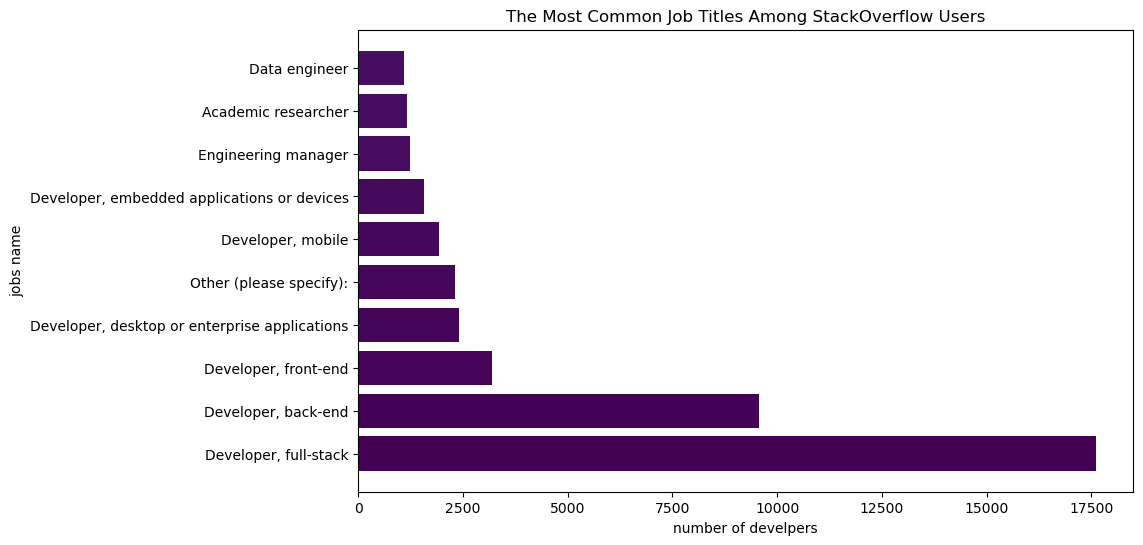

In [481]:
top_jobs_df = pd.DataFrame(top_10_jobs, columns=['Job Title', 'Count'])
job_names = top_jobs_df['Job Title']
job_counts = top_jobs_df['Count']

plt.figure(figsize=(10,6))
plt.barh(job_names, job_counts, color=plt.cm.viridis(range(len(job_names))))
plt.title("The Most Common Job Titles Among StackOverflow Users")
plt.xlabel('number of develpers')
plt.ylabel("jobs name")
plt.show()

In [482]:
all_languages = df['LanguageHaveWorkedWith'].dropna().str.split(';').sum()
language_counter = Counter(all_languages)
top_10_languages = language_counter.most_common(10)
print(top_10_languages)

[('JavaScript', 32811), ('SQL', 27629), ('HTML/CSS', 27380), ('Python', 25763), ('TypeScript', 20889), ('Bash/Shell (all shells)', 18082), ('Java', 15223), ('C#', 14486), ('C++', 10949), ('PHP', 9726)]


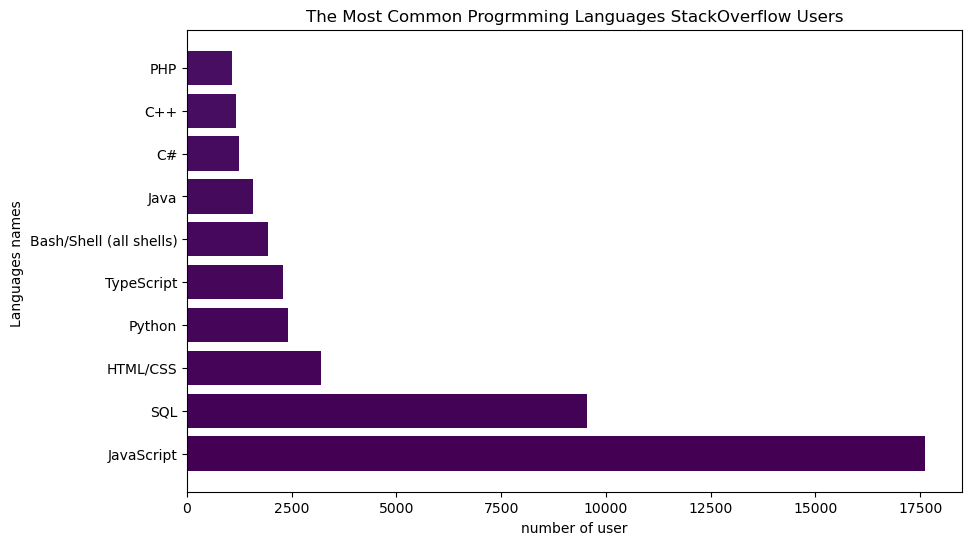

In [483]:
all_languages_df = pd.DataFrame(top_10_languages, columns=['Languages', 'Count'])
languages_names = all_languages_df['Languages']
languages_counts = top_jobs_df['Count']

plt.figure(figsize=(10,6))
plt.barh(languages_names, languages_counts, color=plt.cm.viridis(range(len(languages_names))))
plt.title("The Most Common Progrmming Languages StackOverflow Users")
plt.xlabel('number of user')
plt.ylabel("Languages names ")
plt.show()

In [485]:
stacked = crosstab.stack().reset_index()
stacked.columns = ['DevType', 'Language', 'Count']


stacked = stacked[stacked['Count'] > 0]
stacked.sort_values(by='Count', ascending=False).head(10)

,DevType,Language,Count
391682,"Developer, front-end",HTML/CSS;JavaScript;TypeScript,585
414617,"Developer, full-stack",HTML/CSS;JavaScript;PHP;SQL,307
407225,"Developer, full-stack",C#;HTML/CSS;JavaScript;SQL;TypeScript,305
414787,"Developer, full-stack",HTML/CSS;JavaScript;TypeScript,261
322596,"Developer, back-end",Java,254
407222,"Developer, full-stack",C#;HTML/CSS;JavaScript;SQL,233
391251,"Developer, front-end",HTML/CSS;JavaScript,196
414769,"Developer, full-stack",HTML/CSS;JavaScript;SQL;TypeScript,174
414620,"Developer, full-stack",HTML/CSS;JavaScript;PHP;SQL;TypeScript,167
323371,"Developer, back-end",Python,161
